<a href="https://colab.research.google.com/github/Nilotpal1998/Natural-Language-Processing/blob/main/BertVocabularyExploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring The Bert Vocabulary**

## **Load The Model** 

### **Installing the Hugging Face Transformer**

In [1]:
! pip install pytorch-pretrained-bert

     |████████████████████████████████| 123 kB 7.6 MB/s 
     |████████████████████████████████| 131 kB 44.9 MB/s 
     |████████████████████████████████| 7.9 MB 59.9 MB/s 
     |████████████████████████████████| 79 kB 9.6 MB/s 
     |████████████████████████████████| 138 kB 65.1 MB/s 
     |████████████████████████████████| 127 kB 40.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import torch
from pytorch_pretrained_bert import BertTokenizer 

**Loading the pretrained model tokenizer from Bert**

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

100%|██████████| 231508/231508 [00:00<00:00, 931025.52B/s]


## **Vocabulary Inspection**

### **Vocal Dump**

Our aim is retrieve the entire list of tokens from the vocabulary dictionary and write these text files out so that we can pursue them.

In [5]:
with open("vocabulary.txt","w") as f:
  for token in tokenizer.vocab.keys():
    f.write(token+"\n")

We are seeing that there about 999 tokens which are unused and focusing on them we are infering that **Unused tokens are helpful if you want to introduce specific words to your fine-tuning or further pre-training procedure; they allow you to treat words that are relevant only in your context just like you want, and avoid subword splitting that would occur with the original vocabulary of BERT.**
Most of them are of the form :-
- [unused100]

* Rows 1000-1996 appear to be a dump of individual characters. 
    * They don't appear to be sorted by frequency (e.g., the letters of the alphabet are all in sequence).
* The first word is "the" at position 1997.
    * From there, the words appear to be sorted by frequency. 
    * The top ~18 words are whole words, and then number 2016 is ##s, presumably the most common subword.

### Single Charecter hashed and unhashed

In [7]:
one_chars =[]
hashed_one_chars=[]
for token in tokenizer.vocab.keys():
  if len(token)==1:
    one_chars.append(token)
  elif len(token)==3 and token[0:2]=="##":
    hashed_one_chars.append(token)


In [10]:
print('Number of single character tokens:', len(one_chars), '\n')
for i in range(0, len(one_chars), 50):
    
      end = min(i + 50, len(one_chars) + 1)
    
      print(one_chars[i:end])

Number of single character tokens: 997 

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']
['m', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¹', 'º', '»', '¼', '½', '¾', '¿', '×', 'ß', 'æ', 'ð']
['÷', 'ø', 'þ', 'đ', 'ħ', 'ı', 'ł', 'ŋ', 'œ', 'ƒ', 'ɐ', 'ɑ', 'ɒ', 'ɔ', 'ɕ', 'ə', 'ɛ', 'ɡ', 'ɣ', 'ɨ', 'ɪ', 'ɫ', 'ɬ', 'ɯ', 'ɲ', 'ɴ', 'ɹ', 'ɾ', 'ʀ', 'ʁ', 'ʂ', 'ʃ', 'ʉ', 'ʊ', 'ʋ', 'ʌ', 'ʎ', 'ʐ', 'ʑ', 'ʒ', 'ʔ', 'ʰ', 'ʲ', 'ʳ', 'ʷ', 'ʸ', 'ʻ', 'ʼ', 'ʾ', 'ʿ']
['ˈ', 'ː', 'ˡ', 'ˢ', 'ˣ', 'ˤ', 'α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ', 'λ', 'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'ς', 'σ', 'τ', 'υ', 'φ', 'χ', 'ψ', 'ω', 'а', 'б', 'в', 'г', 'д', 'е', 'ж', 'з', 'и', 'к',

In [11]:
print('Number of single character tokens:', len(hashed_one_chars), '\n')
for i in range(0, len(hashed_one_chars), 50):
    
      end = min(i + 50, len(hashed_one_chars) + 1)
    
      print(hashed_one_chars[i:end])

Number of single character tokens: 997 

['##s', '##a', '##e', '##i', '##n', '##o', '##d', '##r', '##y', '##t', '##l', '##m', '##u', '##h', '##k', '##c', '##g', '##p', '##2', '##z', '##1', '##b', '##3', '##f', '##4', '##6', '##7', '##x', '##v', '##8', '##5', '##9', '##0', '##w', '##j', '##q', '##°', '##₂', '##а', '##и', '##²', '##₃', '##ı', '##₁', '##⁺', '##½', '##о', '##ه', '##ي', '##α']
['##е', '##د', '##ن', '##ν', '##ø', '##р', '##₄', '##₀', '##ر', '##я', '##³', '##ι', '##ł', '##н', '##ᵢ', '##ₙ', '##ß', '##ة', '##ς', '##م', '##−', '##т', '##ː', '##ل', '##ь', '##к', '##♭', '##η', '##ی', '##в', '##ا', '##×', '##¹', '##ы', '##ה', '##ɛ', '##л', '##!', '##"', '###', '##$', '##%', '##&', "##'", '##(', '##)', '##*', '##+', '##,', '##-']
['##.', '##/', '##:', '##;', '##<', '##=', '##>', '##?', '##@', '##[', '##\\', '##]', '##^', '##_', '##`', '##{', '##|', '##}', '##~', '##¡', '##¢', '##£', '##¤', '##¥', '##¦', '##§', '##¨', '##©', '##ª', '##«', '##¬', '##®', '##±', '##´', '##µ', '##¶', '##

Replacing the hashes with comparison of the  hashed tokens with original tokens.

In [12]:
unhashed_tokens=[token.replace("##","") for token in hashed_one_chars]

In [13]:
print('Number of single character tokens:', len(unhashed_tokens), '\n')
for i in range(0, len(unhashed_tokens), 50):
    
      end = min(i + 50, len(unhashed_tokens) + 1)
    
      print(unhashed_tokens[i:end])

Number of single character tokens: 997 

['s', 'a', 'e', 'i', 'n', 'o', 'd', 'r', 'y', 't', 'l', 'm', 'u', 'h', 'k', 'c', 'g', 'p', '2', 'z', '1', 'b', '3', 'f', '4', '6', '7', 'x', 'v', '8', '5', '9', '0', 'w', 'j', 'q', '°', '₂', 'а', 'и', '²', '₃', 'ı', '₁', '⁺', '½', 'о', 'ه', 'ي', 'α']
['е', 'د', 'ن', 'ν', 'ø', 'р', '₄', '₀', 'ر', 'я', '³', 'ι', 'ł', 'н', 'ᵢ', 'ₙ', 'ß', 'ة', 'ς', 'م', '−', 'т', 'ː', 'ل', 'ь', 'к', '♭', 'η', 'ی', 'в', 'ا', '×', '¹', 'ы', 'ה', 'ɛ', 'л', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-']
['.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '¡', '¢', '£', '¤', '¥', '¦', '§', '¨', '©', 'ª', '«', '¬', '®', '±', '´', 'µ', '¶', '·', 'º', '»', '¼', '¾', '¿', 'æ', 'ð', '÷', 'þ', 'đ', 'ħ', 'ŋ', 'œ']
['ƒ', 'ɐ', 'ɑ', 'ɒ', 'ɔ', 'ɕ', 'ə', 'ɡ', 'ɣ', 'ɨ', 'ɪ', 'ɫ', 'ɬ', 'ɯ', 'ɲ', 'ɴ', 'ɹ', 'ɾ', 'ʀ', 'ʁ', 'ʂ', 'ʃ', 'ʉ', 'ʊ', 'ʋ', 'ʌ', 'ʎ', 'ʐ', 'ʑ', 'ʒ', 'ʔ', 'ʰ', 'ʲ', 'ʳ', 'ʷ', 'ʸ', 'ʻ', 'ʼ', 'ʾ', 'ʿ', 'ˈ',

Now we will compare the one charecter structures are identical to the hashed one charecter tokens.

In [18]:
print("Comparison for Equality:-",set(one_chars)==set(unhashed_tokens))

Comparison for Equality:- True


**Taking all the hashed vocabulary together and further exploring them together.** 

In [19]:
hashed=[]
for token in tokenizer.vocab.keys():
  if token[0:2]=="##":
    hashed.append(token)

In [23]:
print("The total number of hashed elements are:-",len(hashed))

The total number of hashed elements are:- 5828


**Getting different length tokens in the vocabulary** 

In [ ]:
len_hashed=[len(token)for token in hashed]
len_hashed

In [34]:
print("Distinct length of Words in the Vocabulary:",set(len_hashed))

Distinct length of Words in the Vocabulary: {3, 4, 5, 6, 7, 8, 9, 10, 11, 12}


In [50]:
length=list(set(len_hashed))
length

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

**Getting the frequencies of different hashed Tokens**

In [51]:
hashed_dict={}

In [52]:
for i in length:
  hashed_dict[i]=0
hashed_dict

{3: 0, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 0, 11: 0, 12: 0}

In [56]:
for token in hashed:
  m=len(token)
  #print(m)
  hashed_dict[m]+=1

In [57]:
hashed_dict

{3: 1994,
 4: 1042,
 5: 2988,
 6: 3154,
 7: 1390,
 8: 652,
 9: 304,
 10: 104,
 11: 22,
 12: 6}

### **Visualisation Of The Hashed Tokens**

Text(0.5, 0, 'Token Length')

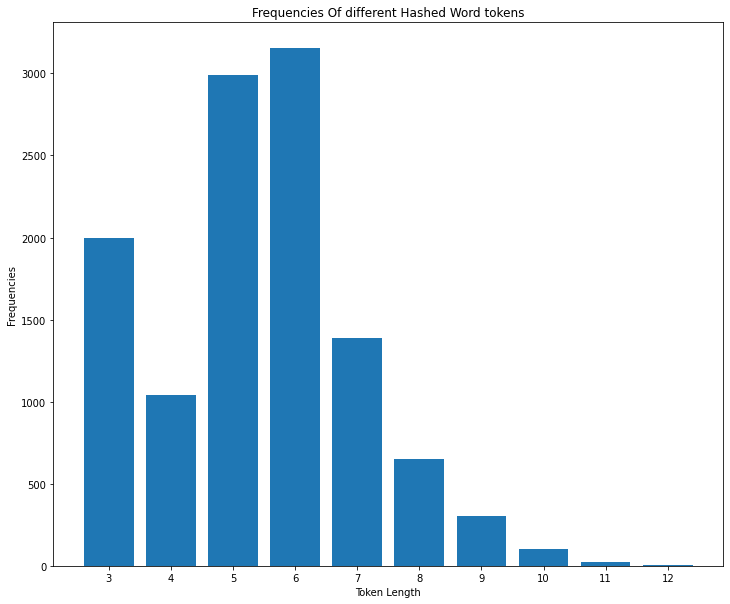

In [70]:
plt.figure(figsize=(12,10))
plt.bar(range(len(hashed_dict)), list(hashed_dict.values()), align='center')
plt.title("Frequencies Of different Hashed Word tokens")
plt.xticks(range(len(hashed_dict)), list(hashed_dict.keys()))
plt.ylabel("Frequencies")
plt.xlabel("Token Length")

In [71]:
import seaborn as sns 

### **Start Words and Sub Words**

In [79]:
hash_len=len(hashed)
full=len(tokenizer.vocab.keys())
print('Number of subwords:',hash_len)
print("Number of words in Vocabulary:",full)
print("The Percentage of hashed tokens :",hash_len/full*100.00)

Number of subwords: 5828
Number of words in Vocabulary: 30522
The Percentage of hashed tokens : 19.09442369438438


In [ ]:
unhashed_tokens2=[tokens.replace("##","")for tokens in hashed]
unhashed_tokens2

In [90]:
Not_present=[]
for token in unhashed_tokens2:
  if not token in one_chars:
    #print("Did not find a token for",token)
    Not_present.append(token)

In [94]:
with open("NotPresent.txt","w") as f1:
  f1.write("These are the list of solely subwords:"+"\n")
  for token in unhashed_tokens2:
    if not token in one_chars:
      f1.write(token+"\n")